# Dataset

O conjunto de dados para este projeto é originário do link:
https://www.kaggle.com/datasets/wlcota/covid19-cases-in-brazil-at-city-level?resource=download

# Importando os módulos

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando e visualizando os Dados

In [392]:
dados = pd.read_csv('Dados/cases-brazil-cities-time_2021.csv')
dados.head()

,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,53,2021-01-01,GO,Abadia de Goiás/GO,5200050,0,8,0,763,87.355,8331.513,0.010
1,53,2021-01-01,MG,Abadia dos Dourados/MG,3100104,0,1,0,110,14.241,1566.505,0.009
2,53,2021-01-01,GO,Abadiânia/GO,5200100,0,13,0,190,62.281,910.267,0.068
3,53,2021-01-01,PA,Abaetetuba/PA,1500107,0,121,0,5120,75.418,3191.244,0.024
4,53,2021-01-01,MG,Abaeté/MG,3100203,0,4,7,275,17.195,1182.135,0.015


# Descrição das Variáveis

**epi_week:**  número da semana epidemiológica.

**date:**  data de reporte.

**state:**  sigla do estado federativo. 

**city:**  nome do município.

**ibgeID:**  código do município no IBGE.

**newDeaths:**  número de novas mortes reportadas.

**deaths:**  número acumulado de mortes reportadas.

**newCases:**  número de novos casos reportados.

**totalCases:**  número acumulado de casos reportados.

**deaths_per_100k_inhabitants:**  número total de mortes a cada 100 mil habitantes.

**totalCases_per_100k_inhabitants:**  número total de casos a cada 100 mil habitantes.

**deaths_by_totalCases:** fração correspondente ao total de mortes / número total de casos.

# Informações sobre as colunas

In [393]:
# Tipos de dados das colunas

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042733 entries, 0 to 2042732
Data columns (total 12 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   epi_week                         int64  
 1   date                             object 
 2   state                            object 
 3   city                             object 
 4   ibgeID                           int64  
 5   newDeaths                        int64  
 6   deaths                           int64  
 7   newCases                         int64  
 8   totalCases                       int64  
 9   deaths_per_100k_inhabitants      float64
 10  totalCases_per_100k_inhabitants  float64
 11  deaths_by_totalCases             float64
dtypes: float64(3), int64(6), object(3)
memory usage: 187.0+ MB


In [394]:
# Quantidade de dados nulos por coluna

dados.isnull().sum()

epi_week                           0
date                               0
state                              0
city                               0
ibgeID                             0
newDeaths                          0
deaths                             0
newCases                           0
totalCases                         0
deaths_per_100k_inhabitants        0
totalCases_per_100k_inhabitants    0
deaths_by_totalCases               0
dtype: int64

### Variáveis numéricas

In [395]:
dados.describe().round(2)

,epi_week,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
count,2042733.00,2042733.00,2042733.00,2042733.00,2042733.00,2042733.00,2042733.00,2042733.00,2042733.00
mean,126.03,3238168.17,0.42,165.96,14.30,6077.64,161.92,7711.20,0.02
std,15.88,1007580.20,20.29,6538.99,675.41,236612.66,113.40,4726.10,0.02
min,53.00,0.00,-1789.00,0.00,-127294.00,0.00,0.00,0.00,0.00
25%,113.00,2510402.00,0.00,6.00,0.00,316.00,75.89,4074.75,0.01
50%,126.00,3145372.00,0.00,15.00,0.00,728.00,139.42,6931.68,0.02
75%,139.00,4118709.00,0.00,39.00,3.00,1888.00,224.33,10594.00,0.03
max,152.00,5300108.00,4146.00,619079.00,124876.00,22288635.00,1739.13,219242.20,4.00


### Variáveis categóricas

In [396]:
dados.describe(include=['O'])

,date,state,city
count,2042733,2042733,2042733
unique,365,28,5597
top,2021-07-02,MG,Abadia de Goiás/GO
freq,5597,311710,365


### Total de Estados / Cidades

In [397]:
print('Há {} estados com registros na base. No Brasil, existem 27 unidades federativas (incluindo o DF).'.format(len(dados['state'].value_counts())))

Há 28 estados com registros na base. No Brasil, existem 27 unidades federativas (incluindo o DF).


In [398]:
print('Há {} cidades com registros na base.'.format(len(dados['city'].value_counts())))

Há 5597 cidades com registros na base.


# Limpando os Dados

### Removendo o estado após o nome da cidade

In [399]:
# Verificando o número de ocorrências por estado

dados['state'].value_counts()

MG       311710
SP       235790
RS       181770
BA       152570
PR       146000
SC       108040
GO        90155
PI        82125
PB        81760
MA        79398
PE        67890
CE        67525
RN        61320
PA        52925
MT        51830
TO        51100
AL        37595
RJ        33945
MS        29200
ES        28835
SE        27740
AM        22995
RO        19345
AC         8395
AP         6205
RR         5840
DF          365
TOTAL       365
Name: state, dtype: int64

In [400]:
# Exluindo as linhas de totalizadores diários (state e city = TOTAL)

dados_sem_totalizadores = dados['state'] != 'TOTAL'
dados_covid = dados[dados_sem_totalizadores]
dados_covid

,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,53,2021-01-01,GO,Abadia de Goiás/GO,5200050,0,8,0,763,87.355,8331.513,0.010
1,53,2021-01-01,MG,Abadia dos Dourados/MG,3100104,0,1,0,110,14.241,1566.505,0.009
2,53,2021-01-01,GO,Abadiânia/GO,5200100,0,13,0,190,62.281,910.267,0.068
3,53,2021-01-01,PA,Abaetetuba/PA,1500107,0,121,0,5120,75.418,3191.244,0.024
4,53,2021-01-01,MG,Abaeté/MG,3100203,0,4,7,275,17.195,1182.135,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...
2042727,152,2021-12-31,RS,Áurea/RS,4301552,0,6,0,351,170.600,9980.097,0.017
2042728,152,2021-12-31,PR,Ângulo/PR,4101150,0,7,0,395,238.826,13476.629,0.018
2042729,152,2021-12-31,BA,Érico Cardoso/BA,2900504,0,5,0,333,47.560,3167.507,0.015
2042730,152,2021-12-31,PA,Óbidos/PA,1505106,0,143,0,7171,272.521,13666.076,0.020


In [401]:
print('foram excluídas {} linhas da tabela correspondentes aos totalizadores diários.'.format(len(dados) - len(dados_covid)))

foram excluídas 365 linhas da tabela correspondentes aos totalizadores diários.


In [402]:
# Revisando as variáveis numéricas após alteração

dados_covid.describe().round(2)

,epi_week,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
count,2042368.00,2042368.00,2042368.00,2042368.00,2042368.00,2042368.00,2042368.00,2042368.00,2042368.00
mean,126.03,3238746.88,0.21,83.00,7.15,3039.36,161.91,7711.15,0.02
std,15.88,1006739.79,3.90,660.33,183.61,16472.34,113.40,4726.43,0.02
min,53.00,11.00,-1789.00,0.00,-127294.00,0.00,0.00,0.00,0.00
25%,113.00,2510501.00,0.00,6.00,0.00,316.00,75.89,4074.43,0.01
50%,126.00,3145406.00,0.00,15.00,0.00,728.00,139.40,6931.38,0.02
75%,139.00,4118808.00,0.00,39.00,3.00,1887.00,224.27,10594.62,0.03
max,152.00,5300108.00,971.00,39561.00,105200.00,977918.00,1739.13,219242.20,4.00


## Avaliando as linhas com dados negativos

### Visulizando as linhas com número de mortes negativo

In [403]:
dados_newDeaths_negativo = dados_covid['newDeaths'] < 0
newDeaths_negativo = dados_covid[dados_newDeaths_negativo]
newDeaths_negativo.tail()


,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
2040603,152,2021-12-31,MG,Ouro Branco/MG,3145901,-1,57,17,5313,141.721,13209.846,0.011
2040747,152,2021-12-31,MG,Pará de Minas/MG,3147105,-1,270,0,7507,282.380,7851.196,0.036
2040988,152,2021-12-31,MG,Piumhi/MG,3151503,-1,118,1,5831,335.828,16595.042,0.020
2041729,152,2021-12-31,BA,Seabra/BA,2929909,-4,89,1,6282,200.586,14158.215,0.014
2042652,152,2021-12-31,ES,Vitória/ES,3205309,-1,1312,75,68915,355.042,18649.164,0.019


In [404]:
# Tirando a cidade de Vitória/ES como exemplo para avaliar o valor negativo

dados_vitoria = dados_covid['city'] == 'Vitória/ES'
vitoria = dados_covid[dados_vitoria]
vitoria.tail()

,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
2020264,152,2021-12-27,ES,Vitória/ES,3205309,1,1314,22,68701,355.583,18591.253,0.019
2025861,152,2021-12-28,ES,Vitória/ES,3205309,-1,1313,32,68733,355.312,18599.912,0.019
2031458,152,2021-12-29,ES,Vitória/ES,3205309,0,1313,66,68799,355.312,18617.773,0.019
2037055,152,2021-12-30,ES,Vitória/ES,3205309,0,1313,41,68840,355.312,18628.868,0.019
2042652,152,2021-12-31,ES,Vitória/ES,3205309,-1,1312,75,68915,355.042,18649.164,0.019


O valor negativo em ***newDeaths*** atualiza o valor da coluna ***deaths***.

> Serão mantidos os valores negativos pois podem se referir a ajustes na contabilização de mortes.

### Visulizando as linhas com número de novos casos negativo

In [405]:
dados_newCases_negativo = dados_covid['newCases'] < 0
newCases_negativo = dados_covid[dados_newCases_negativo]
newCases_negativo.head()


,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
24,53,2021-01-01,MT,Acorizal/MT,5100102,0,7,-1,206,131.852,3880.203,0.034
233,53,2021-01-01,GO,Aparecida de Goiânia/GO,5201405,0,588,-5,40087,97.700,6660.696,0.015
357,53,2021-01-01,SC,Arroio Trinta/SC,4201604,0,1,-1,201,28.193,5666.761,0.005
471,53,2021-01-01,ES,Barra de São Francisco/ES,3200904,0,51,-1,1738,112.580,3836.560,0.029
785,53,2021-01-01,BA,CASO SEM LOCALIZAÇÃO DEFINIDA/BA,29,2,66,-565,7363,0.444,49.506,0.009


In [406]:
# Tirando a cidade de Aparecida de Goiânia/GO como exemplo para avaliar o valor negativo

dados_aparecida = dados_covid['city'] == 'Aparecida de Goiânia/GO'
aparecida = dados_covid[dados_aparecida]
aparecida.head()

,epi_week,date,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
233,53,2021-01-01,GO,Aparecida de Goiânia/GO,5201405,0,588,-5,40087,97.700,6660.696,0.015
5829,53,2021-01-02,GO,Aparecida de Goiânia/GO,5201405,0,588,-3,40084,97.700,6660.198,0.015
11425,101,2021-01-03,GO,Aparecida de Goiânia/GO,5201405,0,588,-1,40083,97.700,6660.032,0.015
17021,101,2021-01-04,GO,Aparecida de Goiânia/GO,5201405,1,589,26,40109,97.866,6664.352,0.015
22617,101,2021-01-05,GO,Aparecida de Goiânia/GO,5201405,2,591,58,40167,98.198,6673.989,0.015


O valor negativo em ***newCases*** atualiza o valor da coluna ***totalCases***.

> Serão mantidos os valores negativos pois podem se referir a ajustes na contabilização de novos casos.

# Análise Exploratória

In [407]:
dados_ano = dados_covid['date'] == '2021-12-31'
dados_ano_total = dados_covid[dados_ano].reset_index().loc[:,['state', 'city', 'deaths', 'totalCases', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases']]
dados_ano_total.head()

,state,city,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,GO,Abadia de Goiás/GO,44,2002,480.454,21860.668,0.022
1,MG,Abadia dos Dourados/MG,20,601,284.819,8558.815,0.033
2,GO,Abadiânia/GO,46,602,220.380,2884.109,0.076
3,PA,Abaetetuba/PA,226,9915,140.864,6179.919,0.023
4,MG,Abaeté/MG,44,1679,189.142,7217.470,0.026


### Totalizador de número de casos e óbitos

In [408]:
print('há {} cidades na base, cujos registros apontam um total de {} casos e {} óbitos.'
      .format(len(dados_ano_total['city'].value_counts()), dados_ano_total['totalCases'].sum(), dados_ano_total['deaths'].sum()))

há 5596 cidades na base, cujos registros apontam um total de 22288635 casos e 619079 óbitos.


### Visulizando os 10 estados com mais casos em Cidades s/ Localização Definida

In [409]:
# Totalizador de casos e óbitos sem localização Definida por Estado

sem_localizacao = dados_ano_total['city'].apply(lambda x: x[0:-3]) == 'CASO SEM LOCALIZAÇÃO DEFINIDA'
sem_localizacao = dados_ano_total[sem_localizacao]
sem_localizacao_total = sem_localizacao.groupby(['state']).agg({'totalCases':'sum', 'deaths':'sum'}).sort_values(by='totalCases', ascending=False).head(10)

sem_localizacao_total

,totalCases,deaths
state,,
BA,12253,313
CE,10352,0
PR,6455,224
ES,5062,258
MG,4266,389
RR,3222,21
MT,572,3
PA,466,6
RO,231,2


### Verificando o total de óbitos por Estado

In [410]:
# Listando os Estados de forma agrupada

estados = dados_ano_total.groupby(['state']).agg({'deaths':'sum'}).sort_values(by='deaths', ascending=False).reset_index()
estados

,state,deaths
0,SP,155205
1,RJ,69467
2,MG,56659
3,PR,40889
4,RS,36444
5,BA,27506
6,CE,24806
7,GO,24695
8,PE,20447
9,SC,20186


Text(0, 0.5, 'Óbitos')

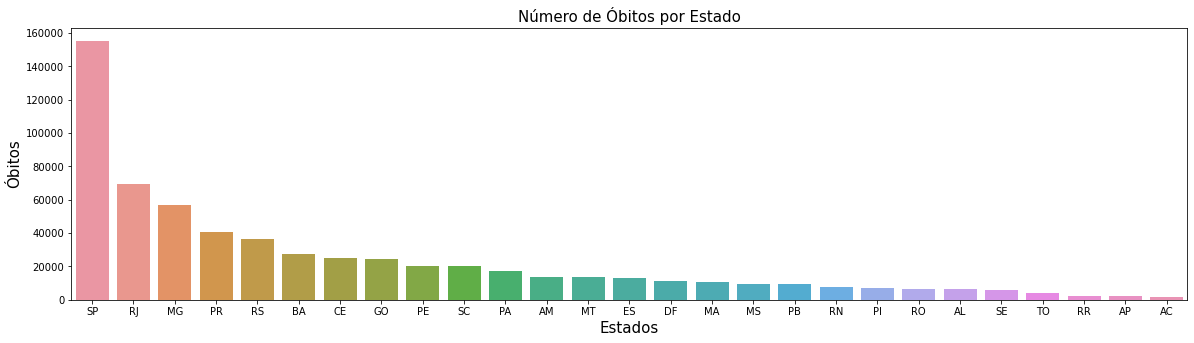

In [411]:
# Plotando o Gráfico

fig, ax = plt.subplots(figsize=(20,5))
ax.set_title("Número de Óbitos por Estado", fontdict={'fontsize':15})
sns.barplot(x = 'state', y = 'deaths', ax=ax, data=estados)
ax.set_xlabel('Estados', fontdict={'fontsize':15})
ax.set_ylabel('Óbitos', fontdict={'fontsize':15})

### Top 5 Cidades com maior número de óbitos

In [412]:
cidades_obitos = dados_ano_total.groupby(['city']).agg({'deaths':'sum'}).sort_values(by='deaths', ascending=False).reset_index()
cidades_obitos = cidades_obitos.head(5).rename(index = lambda x: x + 1)
cidades_obitos

,city,deaths
1,São Paulo/SP,39561
2,Rio de Janeiro/RJ,35190
3,Brasília/DF,11108
4,Fortaleza/CE,9961
5,Manaus/AM,9514


### Top 5 Cidades com maior número de casos

In [413]:
cidades_casos = dados_ano_total.groupby(['city']).agg({'totalCases':'sum'}).sort_values(by='totalCases', ascending=False).reset_index()
cidades_casos = cidades_casos.head(5).rename(index = lambda x: x + 1)
cidades_casos


,city,totalCases
1,São Paulo/SP,977918
2,Brasília/DF,519811
3,Rio de Janeiro/RJ,500346
4,Belo Horizonte/MG,295369
5,Fortaleza/CE,260641


### Top 5 cidades com maior percentual entre Óbitos / Casos

In [414]:
cidades_proporcao = dados_ano_total[['city', 'deaths_by_totalCases']].sort_values(by='deaths_by_totalCases', ascending=False).reset_index(drop=True).rename(index = lambda x: x + 1)
cidades_proporcao['deaths_by_totalCases'] = cidades_proporcao['deaths_by_totalCases'] * 100
cidades_proporcao = cidades_proporcao.head(5).round(0)
cidades_proporcao


,city,deaths_by_totalCases
1,Boa Vista do Gurupi/MA,27.0
2,Miravânia/MG,20.0
3,Prado Ferreira/PR,17.0
4,São Fidélis/RJ,16.0
5,Ribeirão/PE,16.0


### Plotando os Gráficos

Text(0, 0.5, 'Óbitos / Casos Registrados - em %')

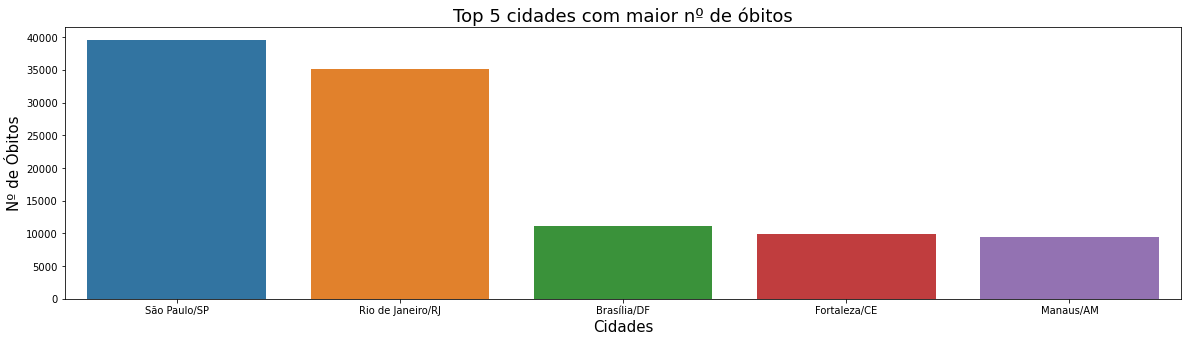

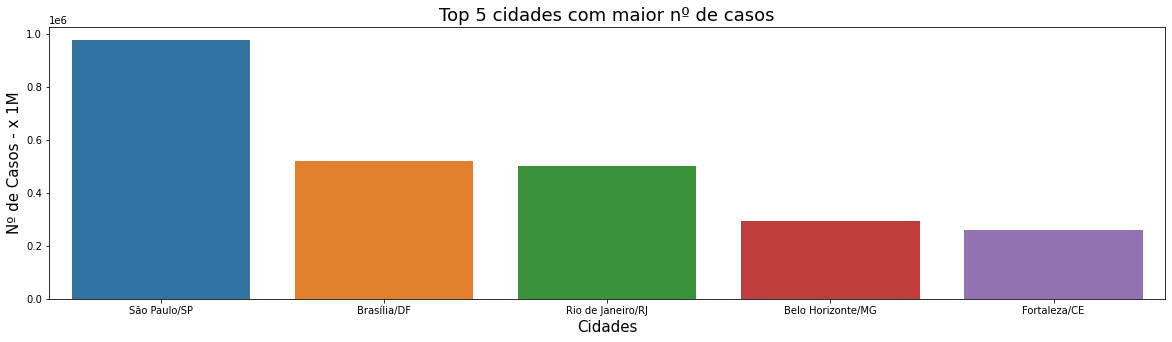

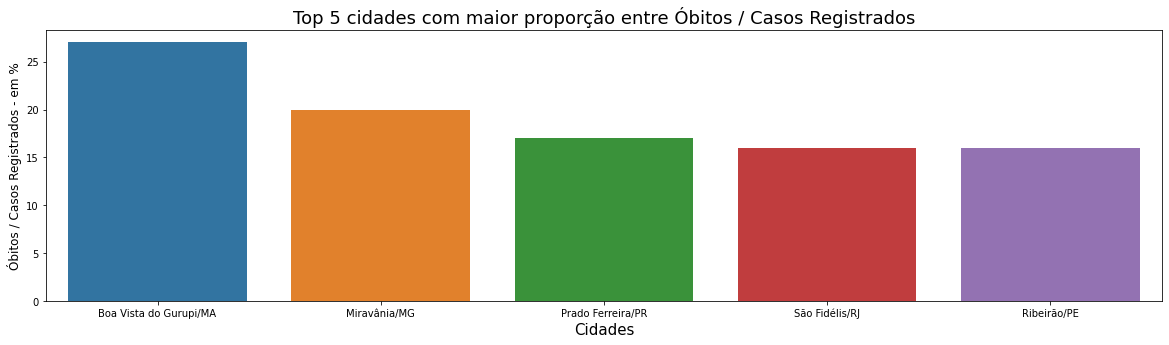

In [415]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title("Top 5 cidades com maior nº de óbitos", fontdict={'fontsize':18})
sns.barplot(x = 'city', y = 'deaths', data = cidades_obitos)
ax.set_xlabel('Cidades', fontdict={'fontsize':15})
ax.set_ylabel('Nº de Óbitos', fontdict={'fontsize':15})

fig, ax = plt.subplots(figsize=(20,5))
ax.set_title("Top 5 cidades com maior nº de casos", fontdict={'fontsize':18})
sns.barplot(x = 'city', y = 'totalCases', data = cidades_casos)
ax.set_xlabel('Cidades', fontdict={'fontsize':15})
ax.set_ylabel('Nº de Casos - x 1M', fontdict={'fontsize':15})

fig, ax = plt.subplots(figsize=(20,5))
ax.set_title("Top 5 cidades com maior proporção entre Óbitos / Casos Registrados", fontdict={'fontsize':18})
sns.barplot(x = 'city', y = 'deaths_by_totalCases', data = cidades_proporcao)
ax.set_xlabel('Cidades', fontdict={'fontsize':15})
ax.set_ylabel('Óbitos / Casos Registrados - em %', fontdict={'fontsize':12})